In [5]:
import math
import random
import numpy as np
import pandas as pd

#calculate to expected damage for dungeons and dragons
def expected_damage(attack, damage, crit_chance, crit_multiplier=2):
    return (1 - crit_chance) * (attack + damage) + crit_chance * (attack + crit_multiplier * damage)


def expected_damage(defender_AC, attack_modifier, expected_damage, bonus_damage=0, num_attacks=1, 
                    crit_added_damage=0, advantage_added_damage=0, crit_chance=0.05, crit_multiplier=2, 
                    advantage=False, disadvantage=False):
    probability_hit = 1.0 - max(defender_AC -1 - attack_modifier, 0) / 20.0 

    if advantage and not disadvantage:
        probability_hit = 1.0 - (1 - probability_hit) ** 2
        crit_chance = 1.0 - (1 - crit_chance) ** 2
        expected_damage += advantage_added_damage
    elif disadvantage and not advantage:
        probability_hit = probability_hit ** 2
        crit_chance = crit_chance ** 2
    
    probability_hit_no_crit = max(0.0, probability_hit - crit_chance)
    
    crit_damage = (expected_damage + crit_added_damage) * crit_multiplier + bonus_damage
    non_crit_damage = expected_damage + bonus_damage
    expected_damage_per_hit = probability_hit_no_crit * non_crit_damage + crit_chance * crit_damage 

    results = {}
    results['probablity_hit'] = probability_hit
    results['crit_chance per round'] = crit_chance * num_attacks
    results['hit damage'] = non_crit_damage
    results['crit damage'] = crit_damage
    results['expected damage per hit'] = expected_damage_per_hit
    results['expected damage per round'] = expected_damage_per_hit * num_attacks
    return results

# CR 0-3 : +5 to hit vs 13 AC requires an 8 or better; 65% to hit.
# CR 4 : (ASI) +6 to hit vs 14 AC requires an 8 or better; 65% to hit.
# CR 5-7 : (Proficiency +3) +7 to hit vs 15 AC requires an 8 or better; 65% to hit.
# CR 8 : (ASI to 20) +8 to hit vs 16 AC requires an 8 or better; 65% to hit.
# CR 9 : (Proficiency +4) +9 to hit vs 16 AC requires a 7 or better; 70% to hit.
# CR 10-12 : +9 to hit vs 17 AC requires an 8 or better; 65% to hit.
# CR 13-16 : (Proficiency +5) +10 to hit vs 18 AC requires an 8 or better; 65% to hit.
# CR 17+ : (Proficiency +6) +11 to hit vs 19 AC requires an 8 or better; 65% to hit.

def dr(num_dice, num_sides):
    return num_dice * (num_sides + 1) / 2

In [11]:
is_health_low = False

hunters_mark = dr(1,6)
hex_curse = 0.1
smite = dr(2,8)

In [12]:
records = []
for param in [dict(advantage=False, disadvantage=False), 
              dict(advantage=True, disadvantage=False), 
              dict(advantage=False, disadvantage=True)]:
    records.append({
        **{
        'name': f'PAM + Duling Style',
        'paladin': 5,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+5, 
        attack_modifier=5, 
        expected_damage=dr(1,6), 
        bonus_damage=2+2,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style',
        'paladin': 6,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+6, 
        attack_modifier=5, 
        expected_damage=dr(1,6), 
        bonus_damage=2+2,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style',
        'paladin': 7,
        'warlock': 0
        },
        **expected_damage(
        defender_AC=10+7, 
        attack_modifier=5, 
        expected_damage=dr(1,6), 
        bonus_damage=2+2+3,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style',
        'paladin': 8,
        'warlock': 0
        },
        **expected_damage(
        defender_AC=10+8, 
        attack_modifier=5, 
        expected_damage=dr(1,6), 
        bonus_damage=2+2+4,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style\n+ Hexblade',
        'paladin': 6,
        'warlock': 1
        },
        **expected_damage(
        defender_AC=10+7, 
        attack_modifier=6, 
        expected_damage=dr(1,6)+dr(1,6), 
        bonus_damage=3+2,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style\n+ Hexblade',
        'paladin': 7,
        'warlock': 1,
        **param
        },
        **expected_damage(
        defender_AC=10+8, 
        attack_modifier=6, 
        expected_damage=dr(1,6)+dr(1,6), 
        bonus_damage=3+2+3,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style\n+ Hexblade',
        'paladin': 8,
        'warlock': 1,
        **param
        },
        **expected_damage(
        defender_AC=10+9, 
        attack_modifier=7, 
        expected_damage=dr(1,6)+dr(1,6), 
        bonus_damage=4+2+4,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})

    records.append({
        **{
        'name': f'PAM + Duling Style\n+ Hexblade',
        'paladin': 7,
        'warlock': 2,
        **param
        },
        **expected_damage(
        defender_AC=10+9, 
        attack_modifier=6, 
        expected_damage=dr(1,6)+dr(1,6), 
        bonus_damage=3+2+3,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})


pam_records = records

In [13]:
records = []
for param in [dict(advantage=False, disadvantage=False), 
              dict(advantage=True, disadvantage=False), 
              dict(advantage=False, disadvantage=True)]:
    records.append({
        **{
        'name': f'Teeth + hunters mark',
        'paladin': 5,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+5, 
        attack_modifier=7, 
        expected_damage=dr(1,4)+dr(1,6), 
        bonus_damage=4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})

    records.append({
        **{
        'name': f'Teeth + hunters mark',
        'paladin': 6,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+6, 
        attack_modifier=7, 
        expected_damage=dr(1,4)+dr(1,6), 
        bonus_damage=4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})

    records.append({
        **{
        'name': f'Teeth + hunters mark',
        'paladin': 7,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+7, 
        attack_modifier=7, 
        expected_damage=dr(1,4)+dr(1,6), 
        bonus_damage=4+4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})

    records.append({
        **{
        'name': f'Teeth + hunters mark\n+ PAM',
        'paladin': 8,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+8, 
        attack_modifier=5, 
        expected_damage=dr(1,6)+dr(1,6), 
        bonus_damage=2+2+2,
        crit_added_damage=smite, 
        num_attacks=3,
        **param
    )})



teeth_fey_records = records

In [14]:
records = []

for param in [dict(advantage=False, disadvantage=False), 
              dict(advantage=True, disadvantage=False), 
              dict(advantage=False, disadvantage=True)]:

    records.append({
        **{
        'name': f'Teeth',
        'paladin': 5,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+5, 
        attack_modifier=7, 
        expected_damage=dr(1,4), 
        bonus_damage=4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})

    records.append({
        **{
        'name': f'Teeth',
        'paladin': 6,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+6, 
        attack_modifier=7, 
        expected_damage=dr(1,4), 
        bonus_damage=4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})


    records.append({
        **{
        'name': f'Teeth',
        'paladin': 7,
        'warlock': 0,
        **param
        },
        **expected_damage(
        defender_AC=10+7, 
        attack_modifier=7, 
        expected_damage=dr(1,4), 
        bonus_damage=4+4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})

    records.append({
        **{
        'name': f'Teeth + hexblade',
        'paladin': 6,
        'warlock': 1,
        **param
        },
        **expected_damage(
        defender_AC=10+7, 
        attack_modifier=7, 
        expected_damage=dr(1,6)*2, 
        bonus_damage=4,
        crit_added_damage=smite, 
        num_attacks=2,
        **param
    )})

teeth_records = records


,name,paladin,warlock,advantage,disadvantage,probablity_hit,crit_chance per round,hit damage,crit damage,expected damage per hit,expected damage per round,level
12,PAM + Duling Style,5,0,False,False,0.5500,0.1500,7.5,29.0,5.20000,15.60000,5
28,PAM + Duling Style,5,0,False,True,0.3025,0.0075,7.5,29.0,2.32250,6.96750,5
20,PAM + Duling Style,5,0,True,False,0.7975,0.2925,7.5,29.0,8.07750,24.23250,5
0,Teeth,5,0,False,False,0.6500,0.1000,6.5,27.0,5.25000,10.50000,5
8,Teeth,5,0,False,True,0.4225,0.0050,6.5,27.0,2.79750,5.59500,5
4,Teeth,5,0,True,False,0.8775,0.1950,6.5,27.0,7.70250,15.40500,5
36,Teeth + hunters mark,5,0,False,False,0.6500,0.1000,10.0,34.0,7.70000,15.40000,5
44,Teeth + hunters mark,5,0,False,True,0.4225,0.0050,10.0,34.0,4.28500,8.57000,5
40,Teeth + hunters mark,5,0,True,False,0.8775,0.1950,10.0,34.0,11.11500,22.23000,5
13,PAM + Duling Style,6,0,False,False,0.5000,0.1500,7.5,29.0,4.82500,14.47500,6


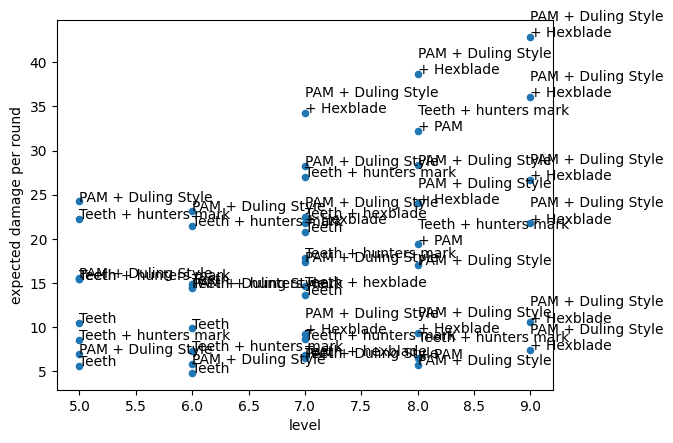

In [16]:

df = pd.DataFrame.from_records(teeth_records+pam_records+teeth_fey_records)
df['level'] = df.paladin + df.warlock
cols = ['name', 'level', 'paladin', 'warlock', 'expected damage per round']
ax = df.plot(x='level', y='expected damage per round', kind='scatter', )

for idx, row in df.iterrows():
    ax.annotate(row['name'], (row['level'], row['expected damage per round']))

df.sort_values(['level', 'name', 'advantage', 'disadvantage'])